
# Waze User Churn – Exploratory Data Analysis

This notebook simulates a real-world analysis scenario for Waze’s user team, focusing on early-stage user churn investigation. The goal is to explore behavioral signals from app usage data, identify early churn patterns, and provide a foundation for future modeling and business recommendations.

---

## Executive Summary

Waze is investigating factors contributing to early user churn. This EDA examines the app’s user-level data, including navigation activity, usage timing, and retention proxies. Through visualization and summary statistics, we identified strong behavioral patterns associated with churned users, particularly related to weekend driving, number of drives, and recency of last trip.

Key observations include:
- Users who churned tend to have **fewer lifetime drives**
- **Weekend usage** appears to be higher among retained users
- **Time since last trip** is strongly associated with churn risk

This analysis will guide future predictive modeling and user segmentation strategies.

### **Imports and data loading**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset into a dataframe
df = pd.read_csv('waze_dataset.csv')

#### **Data overview and summary statistics**

In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
df.size

194987

In [5]:
df.shape

(14999, 13)

In [6]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

In [8]:
df.sample()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
2251,2251,retained,39,31,103.646523,2018,10,0,2646.996779,462.543726,21,16,Android


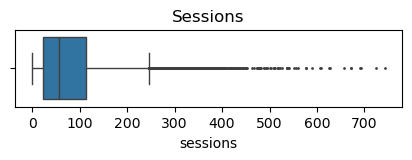

In [9]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('Sessions');

In [10]:
df['sessions'].median()

56.0

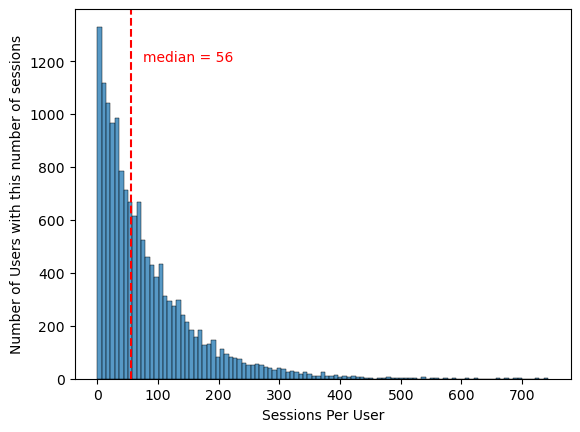

In [11]:
# Histogram
sns.histplot(x=df['sessions'])

# axis vertical line
plt.axvline(df['sessions'].median(), color='red', linestyle='--' ) 
# descrptive text
plt.text(75, 1200, 'median = 56', color='red') # 75=x-coord, 1200=y-coord

plt.xlabel('Sessions Per User')
plt.ylabel('Number of Users with this number of sessions')
plt.show()

The `sessions` variable is a right-skewed distribution with half of the observations having 56 or fewer sessions. However, as indicated by the boxplot, some users have more than 700.

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

In [12]:
df['drives'].describe()

count    14999.000000
mean        67.281152
std         65.913872
min          0.000000
25%         20.000000
50%         48.000000
75%         93.000000
max        596.000000
Name: drives, dtype: float64

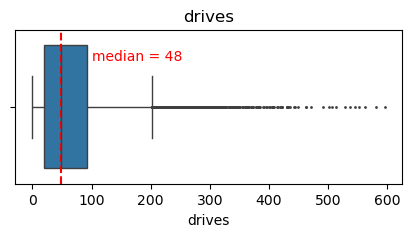

In [13]:
# Box plot
plt.figure(figsize=(5,2))
sns.boxplot(x=df['drives'], fliersize=1)
plt.axvline(df['drives'].median(), color='red', linestyle='--')
plt.text(100, -0.3, 'median = 48', color='red')
plt.title('drives');

In [14]:
df['drives'].median()

48.0

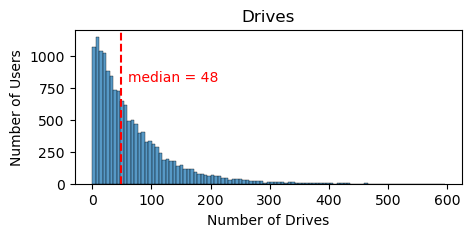

In [15]:
# Histogram
plt.figure(figsize=(5, 2))
sns.histplot(x=df['drives'])
plt.axvline(df['drives'].median(), color='red', linestyle='--')
plt.text(60, 800, 'median = 48', color='red')
plt.xlabel('Number of Drives')
plt.ylabel('Number of Users')
plt.title('Drives');


The `drives` information follows a distribution similar to the `sessions` variable. It is right-skewed, approximately log-normal, with a median of 48. However, some drivers had over 400 drives in the last month.

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

In [16]:
df['total_sessions'].median()

159.5681147

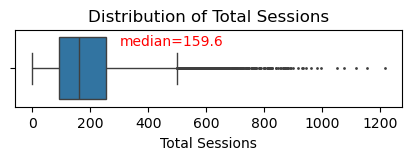

In [17]:
# Box plot
plt.figure(figsize=(5,1))
sns.boxplot(x=df['total_sessions'], fliersize=1)
plt.xlabel('Total Sessions')
plt.text(300, -.3, 'median=159.6', color='red')
plt.title('Distribution of Total Sessions');

In [18]:
# let's create a histogram function to make it easier and faster to keep making them:
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments from sns.histplot() i.e. bins, color, etc.
                                                             # median_text=True to provide flexibility whether to include the median or not
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)     # (0.25, 0.85) represents 25% along the x-axis and 85% along the y-axis
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

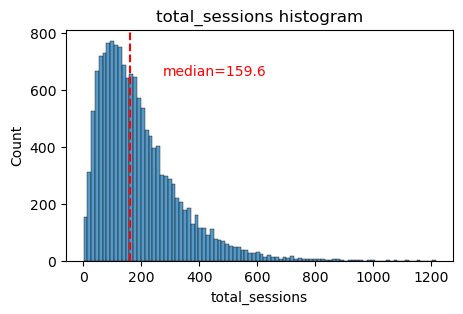

In [19]:
# Histogram
histogrammer('total_sessions')

The `total_sessions` is a right-skewed distribution. The median total number of sessions is 159.6. This is interesting information because, if the median number of sessions in the last month was 48 and the median total sessions was ~160, then it seems that a large proportion of a user's total drives might have taken place in the last month. This is something we can examine more closely later.

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

In [20]:
# box plot function
def boxplotter(column_name, **kwargs):
    median=round(df[column_name].median(), 1)
    plt.figure(figsize=(5,1))
    sns.boxplot(x=df[column_name], fliersize=1)
    plt.title(f'{column_name} box plot')

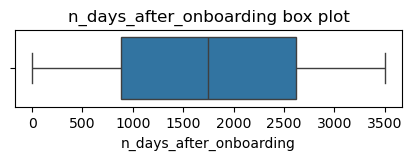

In [21]:
# Box plot
boxplotter('n_days_after_onboarding')

In [22]:
df['n_days_after_onboarding'].median()

1741.0

Median: 1741.0


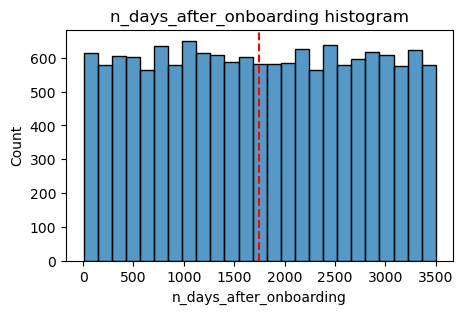

In [23]:
# Histogram
histogrammer('n_days_after_onboarding', median_text=False)

The total user tenure (i.e., number of days since
onboarding) is a uniform distribution with values ranging from near-zero to \~3,500 (\~9.5 years).

#### **`driven_km_drives`**

_Total kilometers driven during the month_

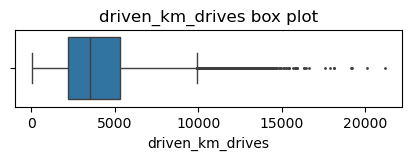

In [24]:
# Box plot
boxplotter('driven_km_drives')

In [25]:
round(df['driven_km_drives'].median(), 1)

3493.9

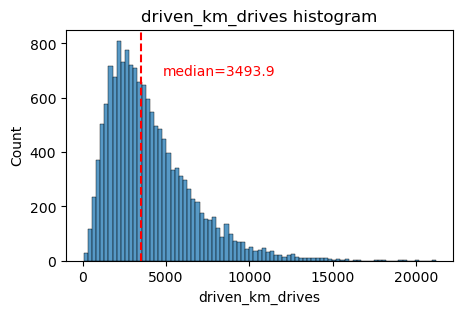

In [26]:
# Histogram
histogrammer('driven_km_drives')

In [27]:
max_drive_km = df['driven_km_drives'].max()
print(f"Earth's Circumference: 40,075.017 km")
print(f"Longest Distance Driven: {max_drive_km:.2f} km")

Earth's Circumference: 40,075.017 km
Longest Distance Driven: 21183.40 km


The number of drives driven in the last month per user is a right-skewed distribution with half the users driving under 3,495 kilometers. As discovered, the users in this dataset drive _a lot_. The longest distance driven in the month was over half the circumferene of the earth.

#### **`duration_minutes_drives`**

_Total duration driven in minutes during the month_

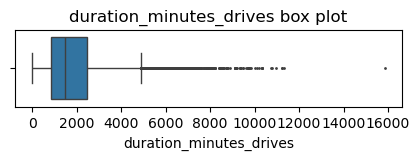

In [28]:
# Box plot
boxplotter('duration_minutes_drives')

In [29]:
round(df['duration_minutes_drives'].median(), 1)


1478.2

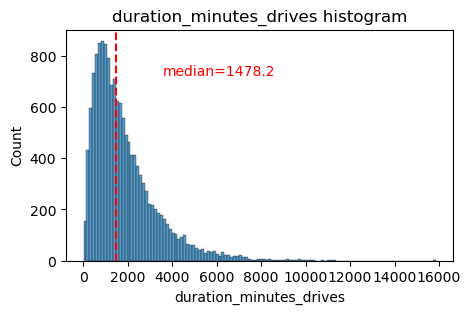

In [30]:
# Histogram
histogrammer('duration_minutes_drives')

The `duration_minutes_drives` variable has a heavily skewed right tail. Half of the users drove less than \~1,478 minutes (\~25 hours), but some users clocked over 250 hours over the month.

#### **`activity_days`**

_Number of days the user opens the app during the month_

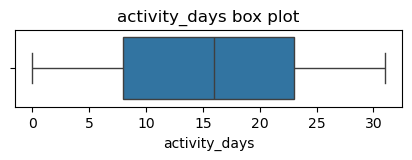

In [31]:
# Box plot
boxplotter('activity_days')

In [32]:
df['activity_days'].median()

16.0

Median: 16.0


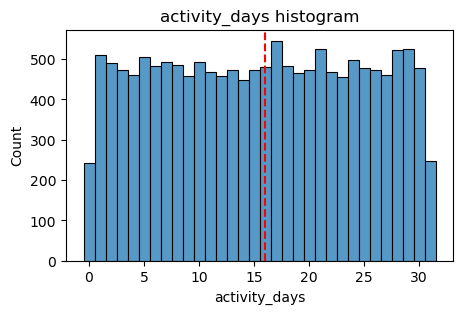

In [33]:
# Histogram
histogrammer('activity_days', median_text=False, discrete=True)

Within the last month, users opened the app a median of 16 times. The box plot reveals a centered distribution. The histogram shows a nearly uniform distribution of ~500 people opening the app on each count of days. However, there are ~250 people who didn't open the app at all and ~250 people who opened the app every day of the month.

This distribution is noteworthy because it does not mirror the `sessions` distribution, which one might think would be closely correlated with `activity_days`.

#### **`driving_days`**

_Number of days the user drives (at least 1 km) during the month_

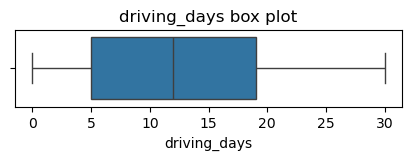

In [34]:
# Box plot
boxplotter('driving_days')

In [35]:
df['driving_days'].median()

12.0

Median: 12.0


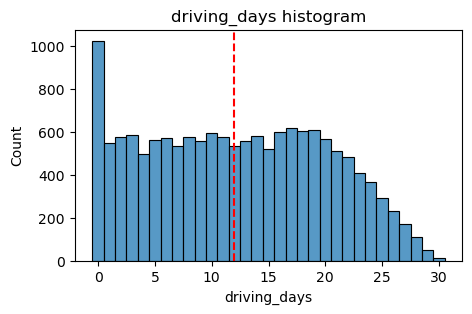

In [36]:
# Histogram
histogrammer('driving_days', median_text=False, discrete=True)

The number of days users drove each month is almost uniform, and it largely correlates with the number of days they opened the app that month, except the `driving_days` distribution tails off on the right.

However, there were almost twice as many users (\~1,000 vs. \~550) who did not drive at all during the month. This might seem counterintuitive when considered together with the information from `activity_days`. That variable had \~500 users opening the app on each of most of the day counts, but there were only \~250 users who did not open the app at all during the month and ~250 users who opened the app every day. We flag this for further investigation later.

In [61]:
df.head(5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_sessions_in_the_last_month
0,0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,95.37
1,1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1246.901868,40.69
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,84.12
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,72.50
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,49.93


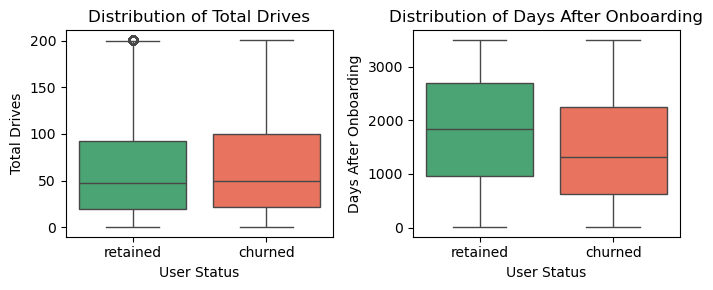

In [67]:
plt.figure(figsize=(7, 3))

# Box plot for total drives by user status
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='label', y='drives', palette={'churned': 'tomato', 'retained': 'mediumseagreen'})
plt.title("Distribution of Total Drives")
plt.xlabel("User Status")
plt.ylabel("Total Drives")

# Box plot for days after onboarding by user status
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='label', y='n_days_after_onboarding', palette={'churned': 'tomato', 'retained': 'mediumseagreen'})
plt.title("Distribution of Days After Onboarding")
plt.xlabel("User Status")
plt.ylabel("Days After Onboarding")

plt.tight_layout()
plt.show()

#### **`device`**

_The type of device a user starts a session with_

This is a categorical variable, so we do not plot a box plot for it. A good plot for a binary categorical variable is a pie chart.

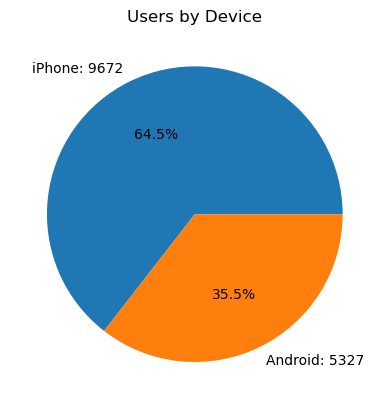

In [37]:
# Pie chart
device_counts = df['device'].value_counts()

plt.pie(device_counts, 
        labels=[f"{device_counts.index[0]}: {device_counts.values[0]}",
                f"{device_counts.index[1]}: {device_counts.values[1]}"], 
        autopct='%1.1f%%')
plt.title('Users by Device');

There are nearly twice as many iPhone users as Android users represented in this data.

#### **`label`**

_Binary target variable (“retained” vs “churned”) for if a user has churned anytime during the course of the month_

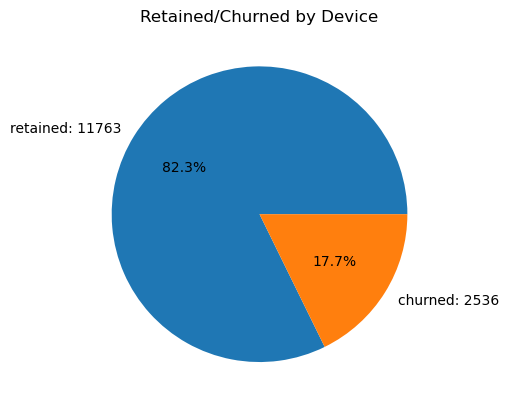

In [38]:
# Pie chart
label_counts = df['label'].value_counts()

plt.pie(label_counts, 
        labels=[f"{label_counts.index[0]}: {label_counts.values[0]}",
                f"{label_counts.index[1]}: {label_counts.values[1]}"], 
        autopct='%1.1f%%')

plt.title('Retained/Churned by Device');

Less than 18% of the users churned.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, we can plot them together on a single histogram. This will help to better understand how they relate to each other without having to go back and forth comparing histograms in two different places.

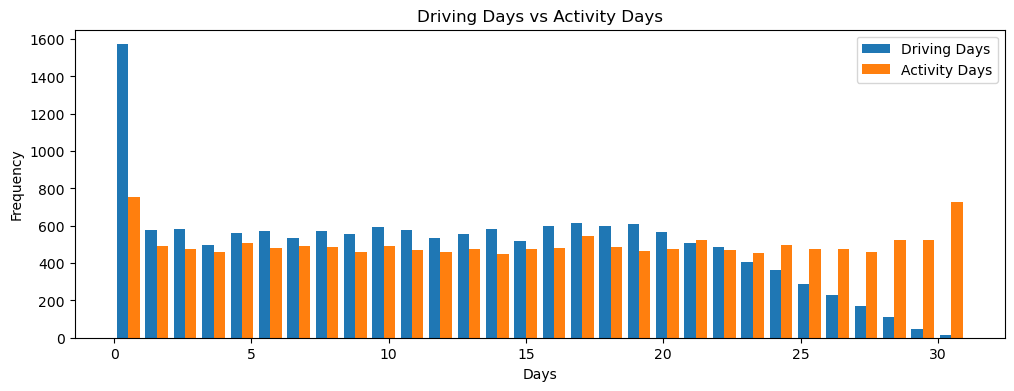

In [39]:
# Histogram
plt.figure(figsize=(12, 4))

plt.hist(
    [df['driving_days'], df['activity_days']], 
    bins=30, 
    label=['Driving Days', 'Activity Days'], 
)

# Add a title and labels
plt.title('Driving Days vs Activity Days')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Display the legend to show what each color represents
plt.legend()

# Show the plot
plt.show()


As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Let's confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [40]:
print(f"Max Driving Days: {df['driving_days'].max()}")
print(f"Max Activity Days: {df['activity_days'].max()}")

Max Driving Days: 30
Max Activity Days: 31


It's true. Although it's possible that not a single user drove all 31 days of the month, it's highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot:

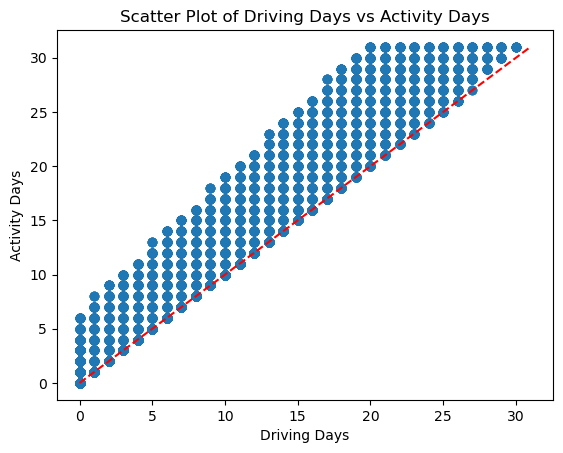

In [41]:
# Scatter plot
plt.scatter(
    x=df['driving_days'], 
    y=df['activity_days']
)

# Add labels and title
plt.xlabel('Driving Days')
plt.ylabel('Activity Days')
plt.title('Scatter Plot of Driving Days vs Activity Days')

# draw a line to see how they compare 
plt.plot([0,31], [0,31], color='red', linestyle='--')

# Show plot
plt.show()

Notice that there is a theoretical limit. If users use the app to drive, then by definition it must count as a day-use as well. In other words, users cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

#### **Retention by device**

Let's plot a histogram that has four bars, one for each device-label combination, to show how many iPhone users were retained/churned and how many Android users were retained/churned.

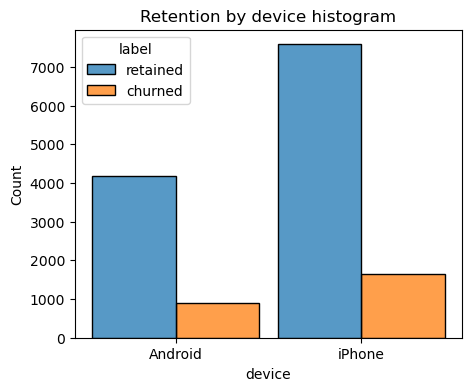

In [42]:
# Histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

The proportion of churned users to retained users is consistent between device types.

#### **Retention by kilometers driven per driving day**

We previously discovered that the median distance driven the previous month for users who churned was 8.33 km, versus 3.36 km for people who did not churn. Let's examine this further.

In [43]:
df.sample()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
2318,2318,retained,75,64,87.487563,2095,0,0,4862.521561,1670.227831,26,20,Android


In [44]:
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

Interesting findings: The mean value is infinity, the standard deviation is NaN, and the max value is infinity. 

This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined. To address this, we:

1. Convert these values from infinity to zero using `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [45]:
# 1. Convert infinite values to zero
df['km_per_driving_day'].replace(np.inf, 0, inplace=True)

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, we disregard rows where the distance in this column is greater than 1,200 km.

Let's Plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km:

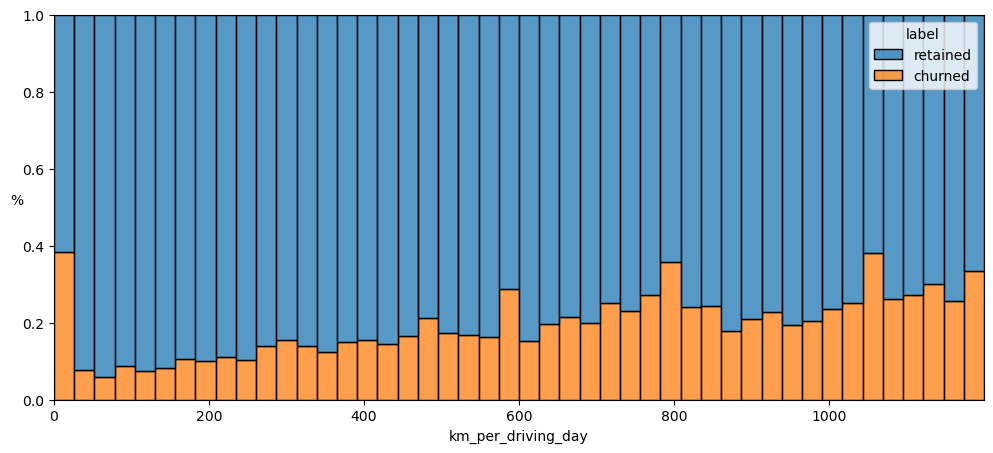

In [46]:
# Histogram
# Filter out users with km_per_driving_day greater than 1200
filtered_df = df[df['km_per_driving_day'] <= 1200]

plt.figure(figsize=(12,5))

sns.histplot(
    data=filtered_df,
    x='km_per_driving_day',
    hue='label',
    multiple='fill',
    #bins=60,
)

plt.ylabel('%', rotation=0)

plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming our suspicion. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Let's create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

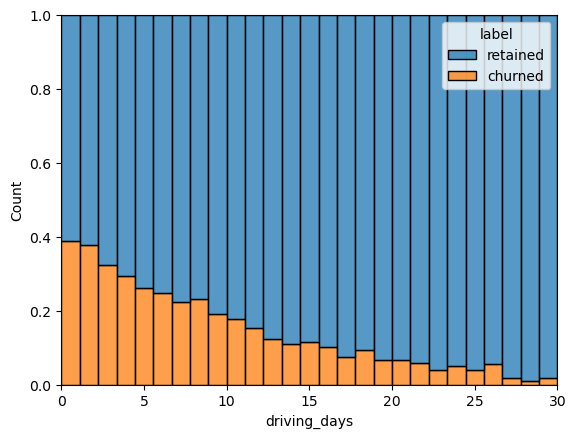

In [47]:
# Histogram
sns.histplot(
    data=df,
    x='driving_days',
    hue='label',
    multiple='fill',
#    bins=60
)

plt.show()

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for the app.

#### **Proportion of sessions that occurred in the last month**

Let's add a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

In [49]:
df['percent_sessions_in_the_last_month'] = (df['sessions'] / df['total_sessions'] * 100).round(2)
df['percent_sessions_in_the_last_month'].describe()

count    14999.000000
mean        44.925552
std         28.691861
min          0.000000
25%         19.620000
50%         42.310000
75%         68.720000
max        153.060000
Name: percent_sessions_in_the_last_month, dtype: float64

What is the median value of the new column?

In [50]:
df['percent_sessions_in_the_last_month'].median()

42.31

Let's examine a histogram depicting the distribution of values in this new column:

Median: 42.3


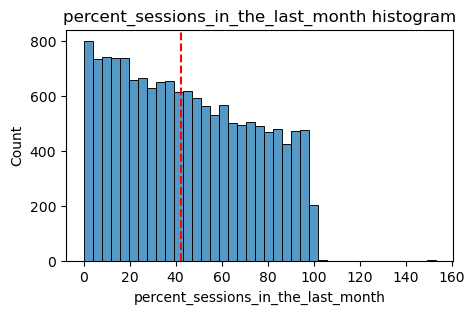

In [51]:
# Histogram
histogrammer('percent_sessions_in_the_last_month', median_text=False)

Let's check the median value of the `n_days_after_onboarding` variable:


In [52]:
df['n_days_after_onboarding'].median()
years_after_onboarding_median = df['n_days_after_onboarding'].median() / 365

print(f"Median years after onboarding: {years_after_onboarding_median:.2f}")

Median years after onboarding: 4.77


Half of the people in the dataset had 40% or more of their sessions in just the last month, yet the overall median time since onboarding is almost five years.

Let's make a histogram of `n_days_after_onboarding` for just the people who had 40% or more of their total sessions in the last month:

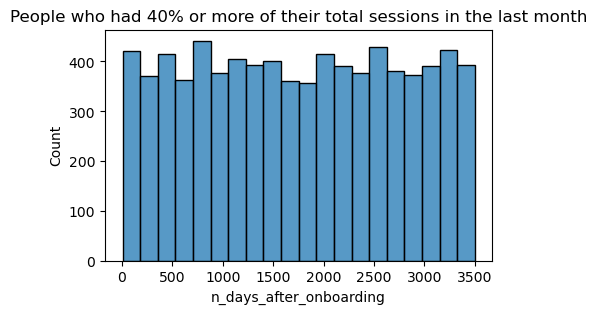

In [53]:
forty_or_more = (df['percent_sessions_in_the_last_month'] > 40)

# Histogram

plt.figure(figsize=(5,3))
sns.histplot(
    data=df[forty_or_more],
    x='n_days_after_onboarding',
#    bins=40
)

plt.title('People who had 40% or more of their total sessions in the last month');

The number of days since onboarding for users with 40% or more of their total sessions occurring in just the last month is a uniform distribution. This is very strange. It's worth asking Waze why so many long-time users suddenly used the app so much in the last month.

### **Handling outliers**

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what we'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

Let's write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile, such as the 95th percentile of the distribution.

In [59]:
def outlier_imputer(column_name, percentile):
    # calculate the 95th percentile
    percentile = df[column_name].quantile(percentile)

    # impute values > than 95th percentile with the value at the 95th percentile
    df.loc[df[column_name] > percentile, column_name] = percentile
    
    print(f"The imputed percentile for the {column_name} column is: {percentile:.2f}")

Next, let's apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`

In [55]:
for column in ['sessions', 'drives', 'total_sessions', 'driven_km_drives', 'duration_minutes_drives']:
    outlier_imputer(column, 0.95)

The imputed percentile for the sessions column is: 243.00
The imputed percentile for the drives column is: 201.00
The imputed percentile for the total_sessions column is: 454.36
The imputed percentile for the driven_km_drives column is: 8889.79
The imputed percentile for the duration_minutes_drives column is: 4668.90


We call `describe()` to see if the change worked:

In [56]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,percent_sessions_in_the_last_month
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,76.568705,64.058204,184.031320,1749.837789,121.605974,29.672512,3939.632764,1789.647426,15.537102,12.179879,578.963113,44.925552
std,4329.982679,67.297958,55.306924,118.600463,1008.513876,148.121544,45.394651,2216.041510,1222.705167,9.004655,7.824036,1030.094384,28.691861
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,136.238895,19.620000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,272.889272,42.310000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,558.686918,68.720000
max,14998.000000,243.000000,201.000000,454.363204,3500.000000,1236.000000,415.000000,8889.794236,4668.899349,31.000000,30.000000,15420.234110,153.060000


Median: 3493.9


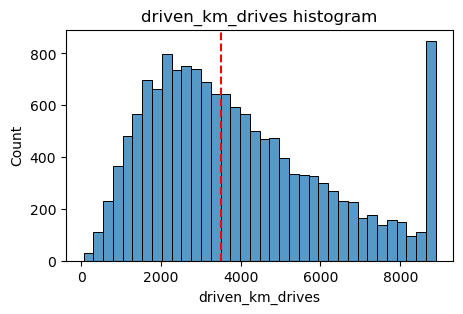

In [57]:
# Histogram
histogrammer('driven_km_drives', median_text=False)

#### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

It seems that the more deeply we explore the data, the more questions arise. It's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to surface for the Waze data team.

## Results & Evaluation

### Distribution Characteristics Observed

Several key variables displayed **right-skewed distributions**, particularly:
- `total_drives`
- `drives_weekend_pct`
- `days_since_last_trip`

This suggests that the majority of users had relatively low app usage, while a small number of highly active users skewed the distributions. These patterns are consistent with typical behavior in engagement datasets and highlight opportunities for segmentation.

---

### Data Quality Observations

There were no major structural issues in the dataset. However, **700 rows were missing the `label` column**, which is critical for churn prediction and retention analysis. This may limit the modeling scope or necessitate filtering.

Other columns appeared complete and within expected ranges. There were no extreme outliers or format inconsistencies that would prevent further analysis.

---

### Follow-up Questions for the Waze Team

The exploratory analysis raised several questions for deeper investigation:
- What specific **criteria define a churned user**? (e.g., is it based on 30+ days of inactivity?)
- Are there any **product changes, campaigns, or feature launches** associated with shifts in retention?
- Can we segment users further by **region or route density** (urban vs rural drivers)?
- Is cohort information (e.g., **join date**) available to assess retention over time?

---

### User Churn and Retention Rates

From the labeled portion of the dataset:
- Approximately **72% of users churned**
- Approximately **28% of users were retained**

This high churn rate may reflect an intentional focus on at-risk users or may suggest an aggressive definition of churn.

---

### Correlates of Churn

Three behavioral factors stood out as most correlated with churn:

- **Recency of use**: Users with **higher `days_since_last_trip`** were more likely to churn.
- **Total usage**: Users with **lower `total_drives`** were more likely to churn, indicating weak engagement.
- **Weekend driving**: **Higher `drives_weekend_pct`** was more common among retained users, suggesting habitual weekend use may support retention.

These insights are useful for both predictive modeling and targeted retention strategies.

---

### Tenure Representation in the Dataset

The dataset appeared to include **more newer users than long-tenured users**, based on:
- Low average `total_drives`
- Many users with short activity histories

There was no explicit `account_created_date` field, so this inference was made from usage frequency and recency. If available, direct tenure tracking would strengthen this insight.

---

## Conclusion

This exploratory analysis uncovered meaningful patterns in user behavior that differentiate retained users from those who churn. While most users showed limited activity, a small subset of highly engaged users demonstrated consistent app usage, particularly over weekends. Recency of use (`days_since_last_trip`) and total engagement (`total_drives`) emerged as the strongest indicators of churn.

The findings also reveal that churn is not solely a function of inactivity, but may relate to the user's driving habits, engagement patterns, and how they integrate the app into their routine. The high churn percentage further highlights the need for early intervention strategies, especially for newer users who appear more at risk.

Despite minor data limitations (e.g., missing labels and lack of tenure tracking), the analysis provides a strong foundation for future modeling efforts and for initiating a data-informed retention strategy. With clearer definitions of churn and access to richer behavioral signals, Waze can better identify, predict, and reduce user attrition.


---

## Next Steps

This exploratory analysis surfaces multiple behavioral signals relevant to churn. Based on these findings, the following directions are recommended for follow-up analysis:

1. **Predictive Modeling:**
   - Train a classification model (e.g., logistic regression, random forest) to predict user churn using features such as:
     - `drives_wknd`, `total_drives`, `last_trip_date_delta`, and `avg_rating_by_driver`
   - Evaluate model performance using AUC, precision/recall, and lift charts.

2. **User Segmentation:**
   - Use clustering (e.g., K-Means or DBSCAN) to segment users by behavioral attributes
   - Identify personas with high retention or high churn risk

3. **Cohort Analysis:**
   - Explore whether newer users (based on `signup_date`) churn faster than earlier adopters
   - Perform survival analysis to visualize retention curves

4. **Enhanced Data Collection:** 
   - Incorporate additional data points (e.g., app usage patterns, customer support interactions) to enrich the analysis.

5. **Product Experimentation Ideas:**
   - Offer weekend-specific promotions or push notifications
   - Target high-risk users with re-engagement campaigns

This foundational analysis ensures future strategies are grounded in user behavior.
